# ReAct Agents
* Reason + Act


In [ ]:
from langgraph.prebuilt import create_react_agent
from langchain_community.agent_toolkits.load_tools import load_tools
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", api_key="your_openai_api_key")
tools = load_tools(["llm-math"], llm=llm)
agent = create_react_agent(llm, tools=tools)

messages = agent.invoke({"messages": [("human", "What is the square root of 101?")]})
print(messages)

# Print the last message content
print(messages['messages'][-1].content)

## Tool Formats

In [ ]:
from langchain_community.agent_toolkits import load_tools

tools = load_tools(["llm-math"], llm=llm)
print(tools[0].name)
# Calculator

print(tools[0].description) 
# Useful for when you need to answer questions about math, such as arithmetic, algebra, calculus, etc. You can also use it to do unit conversions.

print(tools[0].return_direct) # whether the tool returns a direct answer or a message with the answer
# False

### Defining a custom function

In [6]:
from langchain_core.tools import tool

@tool #decorator
def financial_report(company_name: str, revenue: int, expenses: int) -> str:
    """
    Generate a financial report for a given company and year.
    """
    
    net_income = revenue - expenses
    
    report = f"Financial Report for {company_name}:\n"
    report += f"Revenue: ${revenue:,}\n"
    report += f"Expenses: ${expenses:,}\n"
    report += f"Net Income: ${net_income:,}\n"
    
    return report
print(financial_report.name)
print(financial_report.description)
print(financial_report.return_direct)
print(financial_report.args)

financial_report
Generate a financial report for a given company and year.
False
{'company_name': {'title': 'Company Name', 'type': 'string'}, 'revenue': {'title': 'Revenue', 'type': 'integer'}, 'expenses': {'title': 'Expenses', 'type': 'integer'}}


### Integrating the custom tool

In [ ]:
from langgraph import create_react_agent

llm = ChatOpenAI(model="gpt-4o-mini", api_key="your_openai_api_key")
agent = create_react_agent(llm, tools=[financial_report])
messages = agent.invoke({"messages": [("human", "TechStack generated made $10 million with $8 million of costs. Generate a financial report")]})
print(messages)

# get the final message
print(messages['messages'][-1].content)

### **Example Activity**

In [ ]:
@tool
def retrieve_customer_info(name: str) -> str:
    """Retrieve customer information based on their name."""
    customer_info = customers[customers['name'] == name]
    return customer_info.to_string()

# Create a ReAct agent
agent = create_react_agent(llm,tools=[retrieve_customer_info])

# Invoke the agent on the input
messages = agent.invoke({"messages": [("human", "Create a summary of our customer: Peak Performance Co.")]})
print(messages['messages'][-1].content)

## Integrating Document Loaders

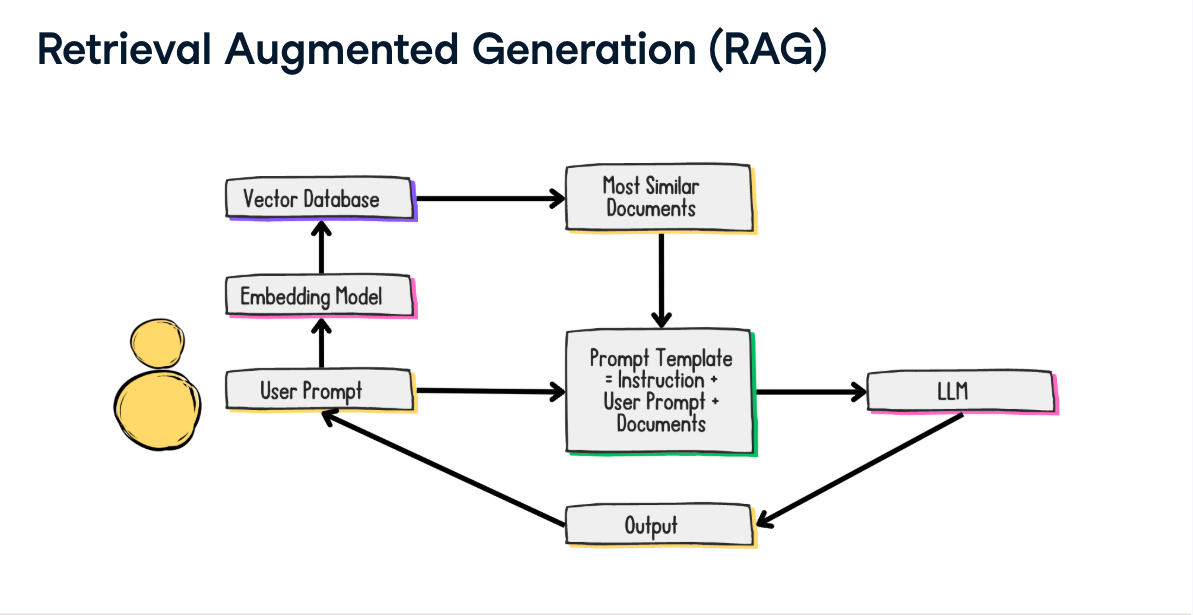

### Document Loaders -> Splitting -> Storage + Retrieval

### **PDF document loader**

In [ ]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("path/to/your/document.pdf")

data = loader.load()

print(data[0])

### **CSV document loader**

In [ ]:
from langchain_community.document_loaders import CSVLoader

loader = CSVLoader(file_path="path/to/your/document.csv")
data = loader.load()
print(data[0])